# All about abalone

## Questions:
- How does age relate to the amount of meat present in an abalone? Does the rate of growth slow after a certain point?
- Do the shell and meat grow at different rates?
- Determine and rank the variables that have the most impact on the amount of meat present in an abalone

# Importing the data and checking for missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read the data
df_raw = pd.read_csv('abalone.csv')
df_raw.head(1)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,16.5


In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [3]:
df_raw.describe().round(2)

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93,11.43
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22,3.22
min,0.08,0.06,0.00,0.00,0.00,0.00,0.00,1.00,2.50
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00,9.50
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00,10.50
75%,0.62,0.48,0.16,1.15,0.50,0.25,0.33,11.00,12.50
max,0.82,0.65,1.13,2.83,1.49,0.76,1.00,29.00,30.50


In [4]:
# check for NA
df_raw.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

# Overview of the relationships of the data

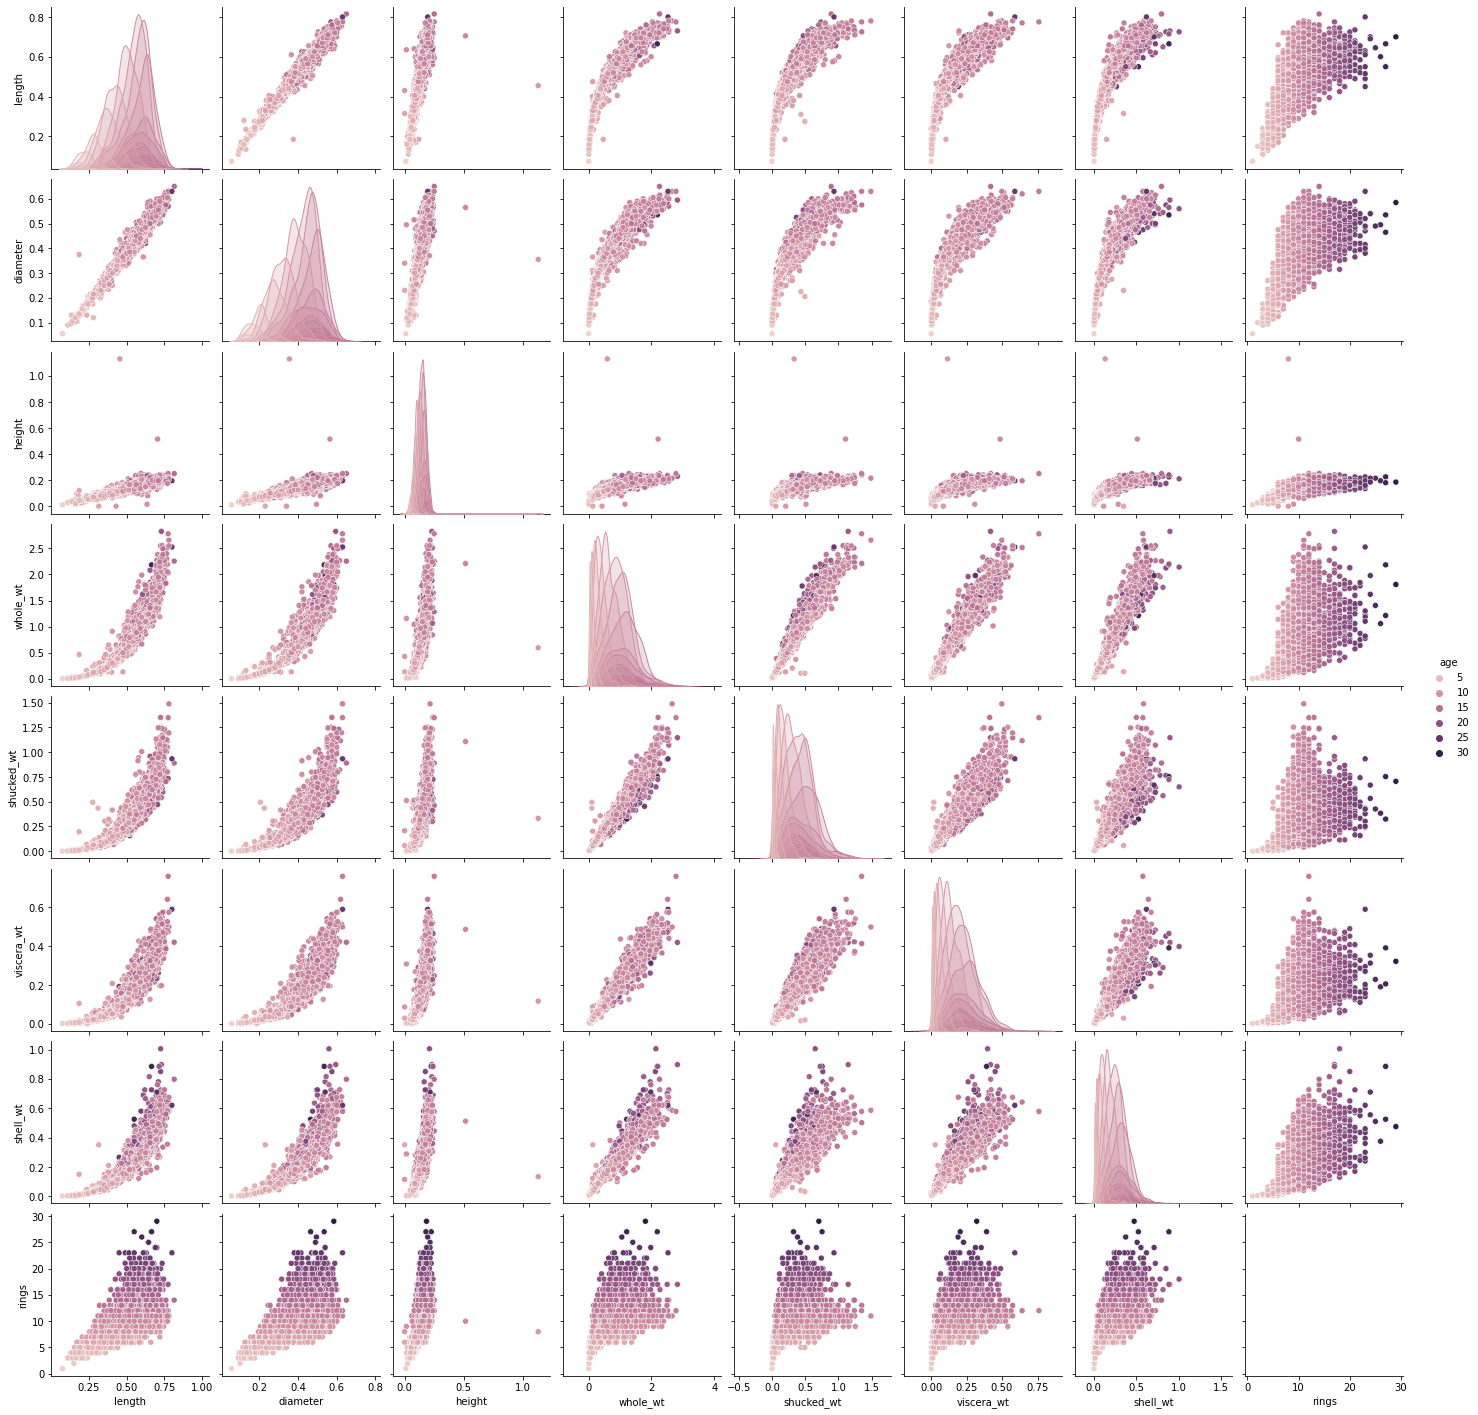

In [5]:
# pairplot of all variables
sns.pairplot(df_raw, hue="age")

There are lots of linear relationships within the data, however, more importantly, the shucked weight exponentially increases as length and diameter increases. Meanwhile, height does not seem to have a strong relationship with the amount of meat present in an abalone.

Unsurprisingly, other variables relating to the weight are highly correlated with the amount of meat present in an abalone.

It's also worth noting that there are some abalones that have unusual height, these seem to be outliers and may need to be exlcuded from the data.

___

# How does age relate to the amount of meat present in an abalone? Does the rate of growth slow after a certain point?

__Findings:__  
The older the abalones, the more meat they tend to have. However, the rate of growth seems to slow down, especially after its "teen years".

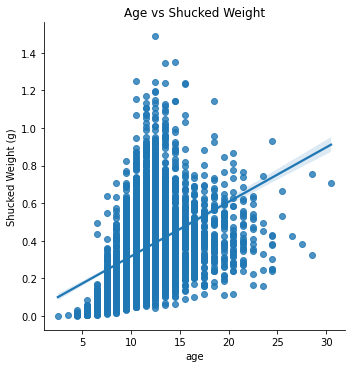

In [60]:
sns.lmplot(x="age", y="shucked_wt", data=df_raw, palette="Set1")
plt.title("Age vs Shucked Weight")
plt.ylabel("Shucked Weight (g)")

plt.show()

In [7]:
# correlation of age and shucked weight
df_raw[["age", "shucked_wt"]].corr().round(2)

,age,shucked_wt
age,1.00,0.42
shucked_wt,0.42,1.00


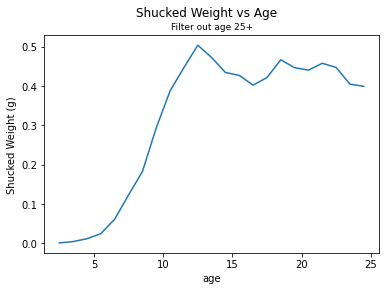

In [47]:
# shucked weight per age
# filter out age 25+
df_filter = df_raw[df_raw["age"] < 25]
df_filter["shucked_wt"].groupby(df_filter["age"]).mean().plot()
plt.title("Filter out age 25+", fontsize=9)
plt.suptitle("Shucked Weight vs Age")
plt.ylabel("Shucked Weight (g)")
plt.show()

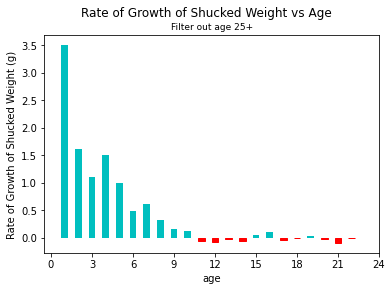

In [69]:
plt.figure(facecolor='white') # for white background

# rate of growth of shucked weight per age

df_filter["shucked_wt"].groupby(df_filter["age"]).mean().pct_change().plot(color='c', kind='bar')
# change bar color to red if negative
for p in plt.gca().patches:
    if p.get_height() < 0:
        p.set_color('r')


# x ticks per 3 years, eliminate decimal
plt.xticks(np.arange(0, 25, 3), np.arange(0, 25, 3).astype(int))
plt.xticks(rotation=0)

plt.title("Filter out age 25+", fontsize=9)
plt.suptitle("Rate of Growth of Shucked Weight vs Age")
plt.ylabel("Rate of Growth of Shucked Weight (g)")
plt.show()

The older the abalones, the more meat they tend to have. However, the rate of growth seems to slow down, especially around its "teen years".

The most meat is present in abalones aged around __13__.

__Note__: Abalones aged 26 and above have been filtered out because they have very few data points and can distort the mean.
___

# Do the shell and meat grow at different rates?


__Findings:__  
  
Yes, the grow at different rates. The meat grows faster than the shell.

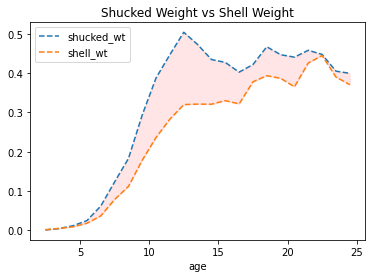

In [10]:
# get average meat weight and shell weight per age
avg_shucked_wt = df_filter["shucked_wt"].groupby(df_filter["age"]).mean()
avg_shell_wt = df_filter["shell_wt"].groupby(df_filter["age"]).mean()

# Do the shell and meat grow at different rates?
avg_shucked_wt.plot(ls="--")
avg_shell_wt.plot(ls="--")

# fill between the two lines to show the difference
plt.fill_between(avg_shucked_wt.index, avg_shucked_wt, avg_shell_wt, alpha=0.1, color="r")

plt.legend(["shucked_wt", "shell_wt"])
plt.title("Shucked Weight vs Shell Weight")
plt.show()

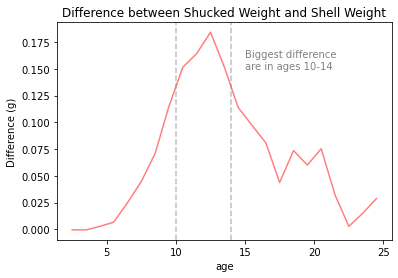

In [70]:
plt.figure(facecolor='white') # for white background

# difference between shucked weight and shell weight
(avg_shucked_wt - avg_shell_wt).plot(color='r', alpha=.5)

# add vertical lines between age 10-14
plt.axvline(x=10, color="grey", ls="--", alpha=0.5)
plt.axvline(x=14, color="grey", ls="--", alpha=0.5)
# add annotation to the 2nd vertical line
plt.annotate("Biggest difference\nare in ages 10-14", xy=(14, 0.17), xytext=(15, 0.15), color="gray")

plt.title("Difference between Shucked Weight and Shell Weight")
plt.ylabel("Difference (g)")
plt.show()


Looking at the average weight of the shell and meat according to their age, it seems that the meat grows faster than its shell. There is a huge difference in growth around the teen years of the abalone.

___

# Determine and rank the variables that have the most impact on the amount of meat present in an abalone

__Findings:__
1. __Whole weight__ was the most important variable in determining the amount of meat present in an abalone.
2. The second most important variable was the __weight of the shell__ of the abalone.
3. This is followed by:
    - Rings
    - Age
    - Viscera weight
    - Length
    - Diameter
    - Height
    - Female
    - Male
    - Infant


Interestingly, even though viscera weight was the 2nd most highly correlated data with meat weight, it was not the 2nd most important variable in determining the amount of meat present in an abalone.

<AxesSubplot:>

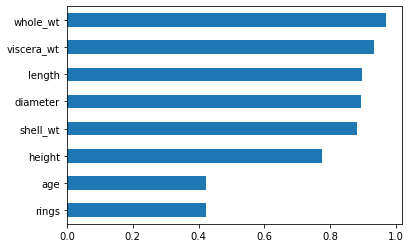

In [12]:
# get the correlation of all variables with shucked weight
df_raw.corr()["shucked_wt"].sort_values()[:-1].plot(kind="barh")

Checking the correlation between the variables and the amount of meat present in an abalone, it seems that the whole weight of the abalone is highly correlated to the amount of meat present in an abalone. Several variables are also highly correlated to the amount of meat present in an abalone, such as the viscera weight, length, etc.

### Use a machine learning model to predict the weight of the meat (shucked weight) of an abalone given the other variables.

In [13]:
# create dummy variables for sex column
df = pd.get_dummies(df_raw, columns=['sex'])
df.head(1)

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,16.5,0,0,1


In [63]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the data into train and test
X = df.drop("shucked_wt", axis=1)
y = df["shucked_wt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

# calculate the mean squared error on train and test data
print("Train MSE: ", mean_squared_error(y_train, rf.predict(X_train)).round(6))
print("Test MSE:  ", mean_squared_error(y_test, y_pred).round(6))


Train MSE:  0.000197
Test MSE:   0.001992


Training MSE is very low, but the test MSE is very high. This means that the model is overfitting the data. This is usually the case with random forests

In [64]:
# print random forest attributes
print("Random Forest Attributes")
print("Number of trees: ", rf.n_estimators)
print("Number of features: ", rf.n_features_in_)
print("Max depth: ", rf.max_depth)
print("Min samples split: ", rf.min_samples_split)
print("Min samples leaf: ", rf.min_samples_leaf)


Random Forest Attributes
Number of trees:  100
Number of features:  11
Max depth:  None
Min samples split:  2
Min samples leaf:  1


In [65]:
# reduce overfitting by limiting the max depth of the tree, increase the min samples split and leaf
rf2 = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=10, min_samples_leaf=10, random_state=42)

# fit the model
rf2.fit(X_train, y_train)

# predict the test data
y_pred = rf2.predict(X_test)

# calculate the mean squared error on train and test data
print("Train MSE: ", mean_squared_error(y_train, rf2.predict(X_train)).round(6))
print("Test MSE:  ", mean_squared_error(y_test, y_pred).round(6))

Train MSE:  0.001091
Test MSE:   0.002162


By limiting the depth of the tree, the model is able to generalize better and the difference between the training and test MSE is reduced. However, it is still slightly overfitting the data.

Although, in this case, what is more important is the rankings of importance of the variables.

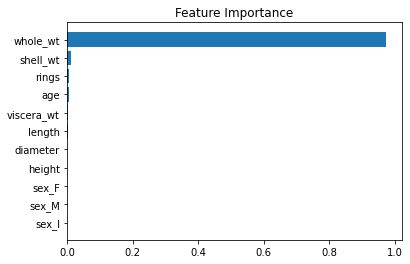

In [71]:
plt.figure(facecolor='white') # for white background

# Feature importance
sort = rf2.feature_importances_.argsort()
plt.barh(X.columns[sort], rf2.feature_importances_[sort])
plt.title("Feature Importance")
plt.show()

Whole weight of the abalone is the top predictor, while shell weight is also slightly important. Gender is the least important variable for predicting the weight of the meat of an abalone.


### Linear Regression with only __whole weight__ as predictor

In [18]:
# linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[["whole_wt"]], y_train)

# predict the test data
y_pred = lr.predict(X_test[["whole_wt"]])

# calculate the mean squared error on train and test data
print("Train MSE: ", mean_squared_error(y_train, lr.predict(X_train[["whole_wt"]])).round(6))
print("Test MSE:  ", mean_squared_error(y_test, y_pred).round(6))

Train MSE:  0.002864
Test MSE:   0.003387


By using only the whole weight of the abalone as a predictor, the model is slighly underfitting the data compared to the random forest model.

### Linear Regression with __whole weight__ and __shell weight__ as predictors

In [19]:
# linear regression
lr2 = LinearRegression()
lr2.fit(X_train[["whole_wt", "shell_wt"]], y_train)

# predict the test data
y_pred = lr2.predict(X_test[["whole_wt", "shell_wt"]])

# calculate the mean squared error on train and test data
print("Train MSE: ", mean_squared_error(y_train, lr2.predict(X_train[["whole_wt","shell_wt"]])).round(6))
print("Test MSE:  ", mean_squared_error(y_test, y_pred).round(6))

Train MSE:  0.001724
Test MSE:   0.002614


By using both the whole weight and the shell weight of the abalone as predictors, the model is able to generalize better.